# Practice 1. 빅데이터 분석 실무
---

## (1) 데이터 수집
---

- 사용할 데이터는 `boston housing` 데이터 세트를 일부 서정한 것이다.
- `boston housing` 데이터 세트는 보스턴 교외 지역의 주택 정보를 담고 있다.

### 데이터 불러오기

In [1]:
import pandas as pd

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data = pd.read_csv('./datasets/Part2/housing_data.csv')
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'isHighValue']
data.columns = col_names

- `head` 함수를 이용해서 데이터 세트의 앞 부분을 확인할 수 있다.

In [3]:
print(data.head())

      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.02731  0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8   
1  0.02729  0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8   
2  0.03237  0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7   
3  0.06905  0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7   
4  0.02985  0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222.0     18.7   

        B  LSTAT  MEDV  isHighValue  
0  396.90   9.14  21.6            0  
1  392.83   4.03  34.7            1  
2  394.63   2.94  33.4            1  
3  396.90   5.33  36.2            1  
4  394.12   5.21  28.7            1  


## (2) 데이터 전처리
---

### 데이터 확인

- 데이터 세트를 불러온 후, 데이터에 대한 기본 정보를 확인하는 과정이 필요하다.
- `shape` 함수로 데이터의 행과 열의 수를 알 수 있다.

In [4]:
print(data.shape)

(525, 15)


> `data`의 `shape`는 `(526, 15)`로 행은 526개, 열은 15개이다.

- `info` 함수를 사용하여 컬럼별 데이터 타입과 `null`이 아닌 행 수를 확인할 수 있다.
- 결측치가 존재하는 컬럼은 데이터 전처리가 필요하므로 결측치의 존재 여부를 미리 확인해야 한다.

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CRIM         505 non-null    float64
 1   ZN           525 non-null    float64
 2   INDUS        525 non-null    float64
 3   CHAS         525 non-null    int64  
 4   NOX          525 non-null    float64
 5   RM           525 non-null    float64
 6   AGE          525 non-null    float64
 7   DIS          525 non-null    float64
 8   RAD          525 non-null    int64  
 9   TAX          525 non-null    float64
 10  PTRATIO      525 non-null    float64
 11  B            525 non-null    float64
 12  LSTAT        525 non-null    float64
 13  MEDV         525 non-null    float64
 14  isHighValue  525 non-null    int64  
dtypes: float64(12), int64(3)
memory usage: 61.7 KB
None


- 위에서 `Non-Null Count`열이 각 컬럼별 `null`이 아닌 행 수를 의미한다.
    - `CRIM` 변수의 `Non-Null Count`가 `506`으로 전체 데이터 행 수가 526개이므로 20개의 결측치가 있는 것으로 보인다.
- `Dtype` 열은 각 컬럼의 데이터 타입을 의미한다.
    - `pd.read_csv`로 csv 파일을 불러올 경우, 자동으로 컬럼의 데이터 타입을 지정하여 불러온다.
    - 따라서 데이터 타입이 잘못 지정되어 있지 않은지 확인하는 과정이 필요하다.

- `describe` 함수를 사용하면 평균, 표준편차, 사분위수 등 수치형 변수에 대해 기본적인 요약 통계량 값을 확인할 수 있다.

In [6]:
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  505.000000  525.000000  525.000000  525.000000  525.000000  525.000000   
mean     3.620667   10.918095   11.323752    0.066667    0.555988    6.270497   
std      8.608572   22.996950    6.930197    0.249682    0.113960    0.698680   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.453000    5.879000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.182000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.616000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          B  \
count  525.000000  525.000000  525.000000  525.000000  525.000000  525.00000   
mean    68.823429    3.742218    9.432381  410.765714   18.519429  357.81379   
std     27.894506    2.085593 

- 실무에서는 히스토그램, 박스 플롯 등의 시각화 방법을 사용하여 각 변수의 분포나 변수 간 관계를 탐색하는데 많은 시간을 사용한다.
- 하지만 실제 시험에서는 시각화가 불가능한 환경이다.

### 결측치 처리

- `info` 함수 결과로부터 `CRIM` 변수에 결측치가 존재하는 것을 확인했다.
- 다른 방식으로 결측치의 개수와 비율을 다시 확인해보자.

In [7]:
print(data.isnull().sum())    # 각 컬럼별 결측치(NaN) 개수 확인

CRIM           20
ZN              0
INDUS           0
CHAS            0
NOX             0
RM              0
AGE             0
DIS             0
RAD             0
TAX             0
PTRATIO         0
B               0
LSTAT           0
MEDV            0
isHighValue     0
dtype: int64


In [8]:
print(data.isnull().sum() / data.shape[0])    # 전체 중 몇 퍼센트를 차지하는지 확인하기

CRIM           0.038095
ZN             0.000000
INDUS          0.000000
CHAS           0.000000
NOX            0.000000
RM             0.000000
AGE            0.000000
DIS            0.000000
RAD            0.000000
TAX            0.000000
PTRATIO        0.000000
B              0.000000
LSTAT          0.000000
MEDV           0.000000
isHighValue    0.000000
dtype: float64


- 결측치를 다른 값으로 대치할 경우 아래와 같이 `fillna` 함수를 사용할 수 있다.

In [9]:
data1 = data.copy()
med_val = data['CRIM'].median()
data1['CRIM'] = data1['CRIM'].fillna(med_val)

- 결측치가 존재하는 모든 행을 제거하려면 `dropna` 함수를 사용하면 편하다.

In [10]:
data = data.loc[data['CRIM'].notnull(), ]
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean     3.620667   11.350495   11.154257    0.069307    0.554728    6.284059   
std      8.608572   23.343704    6.855868    0.254227    0.115990    0.703195   
min      0.009060    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082210    0.000000    5.190000    0.000000    0.449000    5.885000   
50%      0.259150    0.000000    9.690000    0.000000    0.538000    6.208000   
75%      3.678220   12.500000   18.100000    0.000000    0.624000    6.625000   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  505.000000  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    68.581584    3.794459    9.566337  408.459406   18.461782  356.594376   
std     28.176371    2.1077

### 이상치 처리

- **박스 플롯**을 이용하면 데이터의 대략적인 분포와 IQR 값 기준의 이상치 유무를 쉽게 확인할 수 있다.
- 일반적으로 이상치를 판단할 때 IQR(Interquartile Range) 값을 확인한다.
- IQR은 Q3(제3사분위)에서 Q1(제1사분위)를 뺀 값으로, <mark>(Q1 - 1.5 * IQR) 값보다 작거나 (Q3 + 1.5 * IQR) 값보다 크면</mark> 이상치로 판단한다.

<Axes: >

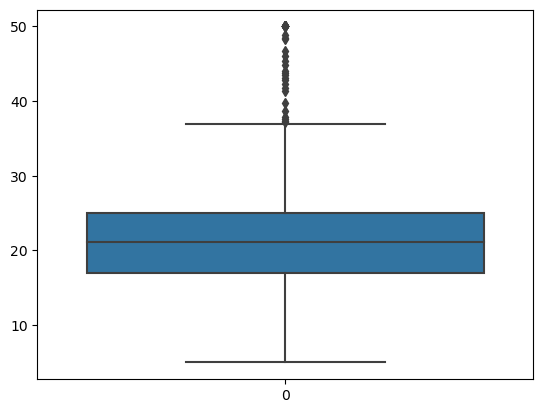

In [11]:
import seaborn as sns

sns.boxplot(data['MEDV'])

> 위 박스 플롯을 보았을 때 `MEDV`는 20 부근에 값이 주로 산포해 있고, 이상치가 존재하는 것으로 보인다.

- 실제 IQR 값을 구하여 이상치 비율을 확인해보자.

In [12]:
Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("이상치 범위: %.2f 초과 또는 %.2f 미만" % (upper_bound, lower_bound))
print("이상치 개수 : %.0f" % len(data[(data['MEDV'] > upper_bound) | (data['MEDV'] < lower_bound)]))
print("이상치 비율 : %.2f" % (len(data[(data['MEDV'] > upper_bound) | (data['MEDV'] < lower_bound)]) / len(data)))


이상치 범위: 37.00 초과 또는 5.00 미만
이상치 개수 : 37
이상치 비율 : 0.07


- 위 코드를 함수화하여 전체 컬럼의 이상치 비율을 확인할 수 있다.

In [13]:
def get_outlier_prop(x):
    Q1, Q3 = x.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    outliers = x[(x > upper_bound) | (x < lower_bound)]

    return str(round(100 * len(outliers) / len(x), 1)) + '%'

print(data.apply(get_outlier_prop))

CRIM           13.1%
ZN             13.5%
INDUS           0.0%
CHAS            6.9%
NOX             0.0%
RM              5.9%
AGE             0.0%
DIS             1.0%
RAD             0.0%
TAX             0.0%
PTRATIO         3.0%
B              15.0%
LSTAT           1.4%
MEDV            7.3%
isHighValue     0.0%
dtype: object


- 이상치로 판단되는 관측치는 모두 제거해야할까?
    - 이상치를 모두 제거할 경우 전체 데이터 행 수가 너무 많이 줄어들 우려가 있다.
    - 통계적으로 이상치일지라도 의미상 이상치가 아닐 수도 있다.
- 실무에서는 변수의 의미, 종속 변수를 비롯한 다른 변수와의 관계를 충분히 파악한 후 이상치를 제거한다.
- 필요한 경우 아래와 같이 이상치 제거 작업을 진행할 수 있다.

In [14]:
# 예시 1 : IQR 값 기준으로 MDEV 변수의 이상치를 제거
Q1, Q3 = data['MEDV'].quantile([0.25, 0.75])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

data1 = data[(data['MEDV'] <= upper_bound) & (data['MEDV'] >= lower_bound)]
data1.shape

(468, 15)

In [15]:
# 예시 2 : MEDV 변수 값이 45 이상인 경우를 이상치로 보고 제거
data2 = data[~(data['MEDV'] >= 45)]
data2.shape

(483, 15)

### 변수 변환

- 데이터 전처리 시 변수 변환을 하는 경우는 크게 2가지가 있다.
    - 변수의 분포가 한쪽으로 크게 치우쳐져 있어 정규 분포를 따른다고 보기 힘든 경우
    - 데이터 스케일링
        - 각 변수별로 데이터의 범위 및 단위가 다른 경우 학습이 제대로 이루어지지 않을 수 있다.
        - 단, 데이터 스케일링 시 학습 데이터로만 스케일러를 적합시켜야 한다.

/var/folders/s0/drl80mj11jl39y1rwvxzpk1h0000gn/T/ipykernel_2943/3452355628.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[cols[idx]], ax=axs[_row][_col])
/var/folders/s0/drl80mj11jl39y1rwvxzpk1h0000gn/T/ipykernel_2943/3452355628.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dat

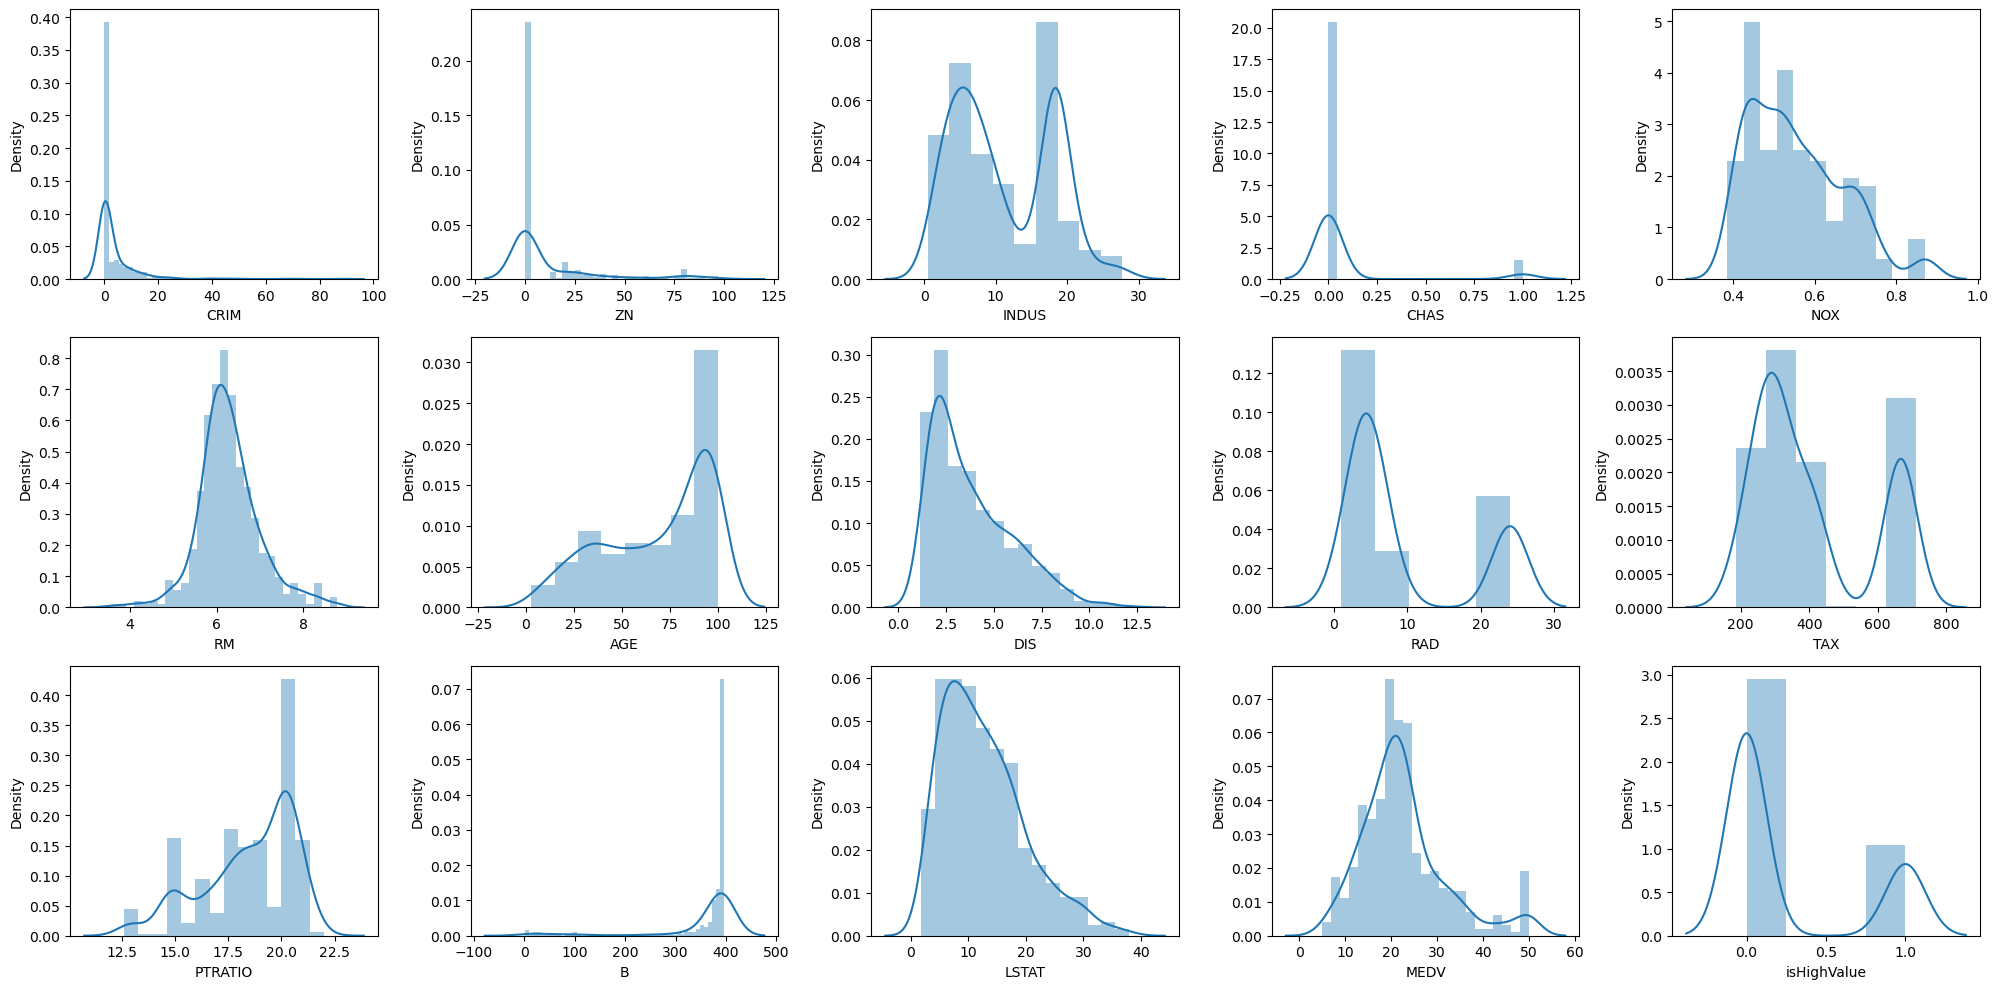

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = data.columns

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 10))
idx = 0
for _row in range(3):
    for _col in range(5):
        if idx < len(cols):
            sns.distplot(data[cols[idx]], ax=axs[_row][_col])
            idx += 1

plt.tight_layout()

- `skew` 함수를 사용하면 왜도 값을 구할 수 있다.
- 이론적으로 왜도의 절댓값이 **`3` 이상**이면 크게 치우쳐져 있다고 본다. (`|skewness| >= 3`)

In [17]:
print(data.apply(lambda x: x.skew(), axis=0))

CRIM           5.218396
ZN             2.225665
INDUS          0.292762
CHAS           3.401726
NOX            0.727784
RM             0.405743
AGE           -0.599111
DIS            1.011674
RAD            1.002744
TAX            0.666800
PTRATIO       -0.809145
B             -2.886747
LSTAT          0.904753
MEDV           1.108036
isHighValue    1.089353
dtype: float64


> 왜도 값을 구한 결과 `CRIM` 변수의 왜도가 `5.233`으로 `3`보다 크게 나왔으므로 `CRIM` 변수에 대해 **로그 변환**을 해준다.

In [18]:
import numpy as np

data['CRIM'] = np.log1p(data['CRIM'])
print(data['CRIM'].skew())

1.2665800822867268


## (3) 회귀 모델링
---

### 데이터 탐색

- 모형 구축 전, 다양한 도표, 그래프 등을 활용하여 데이터 탐색을 할 수 있다.
- 실무에서는 데이터 탐색에 많은 시간과 노력을 들인다.
- **회귀 모델**에서는 종속 변수로 `MEDV` 변수를 사용한다.
- **분류 모델**의 종속 변수로 사용할 `isHighValue` 변수는 제외하여 `df_r`라는 데이터프레임으로 저장한 후 데이터 탐색을 진행하고자 한다.

In [19]:
df_r = data.drop(['isHighValue'], axis=1)

- `corr` 함수를 사용하면 변수들간의 상관관계 행렬을 구할 수 있다.
- 상관 관계 행렬은 기본적으로 **피어슨 상관 관계 계수** 값을 보여주며, <u>변수 간의 선형 관계</u>를 나타낸다.

In [20]:
cols = ['MEDV', 'LSTAT', 'RM', 'CHAS', 'RAD', 'TAX']
print(df_r[cols].corr())

           MEDV     LSTAT        RM      CHAS       RAD       TAX
MEDV   1.000000 -0.738187  0.695365  0.175364 -0.381690 -0.468543
LSTAT -0.738187  1.000000 -0.613734 -0.054576  0.487608  0.543435
RM     0.695365 -0.613734  1.000000  0.091497 -0.209277 -0.291680
CHAS   0.175364 -0.054576  0.091497  1.000000 -0.007907 -0.035965
RAD   -0.381690  0.487608 -0.209277 -0.007907  1.000000  0.910202
TAX   -0.468543  0.543435 -0.291680 -0.035965  0.910202  1.000000


- `RAD` 변수와 `TAX` 변수 사이의 상관계수가 `0.9102`로 아주 강한 상관 관계를 갖는다. 
    - 이렇듯, 독립 변수들 간에 강한 상관관계가 존재할 경우 **다중 공선성**을 갖는다고 한다.
- 다중 공선성이 존재하는 경우 회귀 모델 성능에 안 좋은 영향을 줄 수 있어 제거하는 것이 좋다. 
    - 둘 중 하나의 변수만 사용하거나 **주성분 분석(PCA)** 등의 방법을 사용할 수 있다.

### 분석 모형 구축

#### ① 데이터 분할

- 모델 구축 전 데이터를 **학습 데이터**와 **검증 데이터**로 나누는 작업이 필요하다. (7:3으로 나눠본다.)
- 독립 변수 전체를 사용하지 않고, 종속 변수와 상관 관계가 높게 나온 일부 변수만 사용하도록 한다.

In [21]:
from sklearn.model_selection import train_test_split

X_cols = ['LSTAT', 'PTRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = df_r[X_cols].values
y = df_r['MEDV'].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.3, random_state=123)

#### ② 데이터 스케일링

- Min-Max 스케일링 방법을 사용해본다.

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_r_scaled = scaler.fit_transform(X_train_r)
X_test_r_scaled = scaler.transform(X_test_r)

#### ③ 모델 구축

- `sklearn` 패키지를 이용하여 선형 회귀, SVM, 랜덤 포레스트 모델을 만들어보자.
- 각 모델은 각각 다양한 하이퍼 파라미터(초매개변수)를 가지고 있으며, 실무에서는 하이퍼 파라미터 튜닝을 통해 모델 성능을 극대화하는 작업을 하게 된다.
- 하지만 시험에서는 극도로 높은 성능의 모델을 요구하지 않으며, 하이퍼 파라미터 튜닝은 많은 시간과 노력을 필요로 하므로 시험을 준비할 때는 <mark>알고리즘별로 하이퍼 파라미터 종류와 의미, 튜닝 방법</mark>을 익히는 데 중점을 두자.

##### (a) 선형 회귀(Linear Regression)

In [23]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()
model_lr.fit(X_train_r_scaled, y_train_r)

LinearRegression()

- 모델의 `coef_`, `intercept_` 값을 이용해 각각 선형 회귀 모델의 계수와 절편을 알 수 있다.
- 계수 값의 부호가 양(+)이면 종속 변수와 해당 변수가 **양의 관계**, 부호가 음(-)이면 **음의 관계**를 뜻한다.
- 계수 값이 클수록 그 영향도가 크다고 볼 수 있다.

In [24]:
print(model_lr.coef_)

[-30.94029113 -12.24235036  -1.7097398    6.31605213  -5.56149122
  -1.28191968   5.10608608]


In [25]:
print(model_lr.intercept_)

37.30846591965027


##### (b) SVM

In [26]:
from sklearn.svm import SVR

model_svr = SVR()
model_svr.fit(X_train_r_scaled, y_train_r)

SVR()

In [27]:
print(model_svr.dual_coef_)

[[-1.         -1.          1.         -1.          1.          1.
   1.         -1.          1.         -1.          1.          1.
  -1.          1.          1.         -0.85315988  1.          1.
   1.          1.          1.         -1.         -1.          1.
  -1.         -1.          1.          1.          1.         -1.
   1.         -1.          1.         -1.         -1.          1.
  -1.          1.         -1.         -1.         -1.         -1.
  -1.         -1.         -1.         -1.          1.         -1.
  -1.         -1.          0.01742517  1.          1.         -1.
  -1.          1.         -1.         -1.         -1.         -1.
   1.         -1.          1.         -1.          1.          1.
  -1.         -1.         -1.         -1.          1.          0.74099787
  -1.         -1.         -1.         -1.          1.          1.
   1.          0.29220259  1.         -1.         -1.          1.
   1.          0.71280479  1.         -1.          1.          1.
  

In [28]:
print(model_svr.intercept_)

[21.72540229]


##### (c) 랜덤 포레스트

In [29]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor(random_state=123)
model_rfr.fit(X_train_r_scaled, y_train_r)

RandomForestRegressor(random_state=123)

- 모델의 `feature_importances_` 값을 이용해 모델에서 사용하는 변수 중요도를 확인할 수 있다.

In [30]:
for x, val in zip(X_cols, model_rfr.feature_importances_):
    print(f'{x} : %.3f' % val)

LSTAT : 0.697
PTRATIO : 0.070
TAX : 0.037
AGE : 0.054
NOX : 0.046
INDUS : 0.017
CRIM : 0.080


### 분석 모형 평가

- 데이터를 분할하여 만들었던 테스트 데이터로 회귀 모델을 평가해보자.
- 회귀 모델의 평가 지표 중 **MAE, MSE, MAPE**를 사용하려고 한다.

In [31]:
y_pred_lr = model_lr.predict(X_test_r_scaled)
y_pred_svr = model_svr.predict(X_test_r_scaled)
y_pred_rfr = model_rfr.predict(X_test_r_scaled)

- 예측값과 실제값을 이용해서 평가 지표 값을 구한다.

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("-" * 30)
print("선형 회귀 결과")
print("MAE : %.3f" % mean_absolute_error(y_test_r, y_pred_lr))
print("MSE : %.3f" % mean_squared_error(y_test_r, y_pred_lr))
print("MAPE : %.3f" % mean_absolute_percentage_error(y_test_r, y_pred_lr))

print("-" * 30)
print("SVM 결과")
print("MAE : %.3f" % mean_absolute_error(y_test_r, y_pred_svr))
print("MSE : %.3f" % mean_squared_error(y_test_r, y_pred_svr))
print("MAPE : %.3f" % mean_absolute_percentage_error(y_test_r, y_pred_svr))

print("-" * 30)
print("랜덤 포레스트 결과")
print("MAE : %.3f" % mean_absolute_error(y_test_r, y_pred_rfr))
print("MSE : %.3f" % mean_squared_error(y_test_r, y_pred_rfr))
print("MAPE : %.3f" % mean_absolute_percentage_error(y_test_r, y_pred_rfr))

print("-" * 30)

------------------------------
선형 회귀 결과
MAE : 4.399
MSE : 34.761
MAPE : 0.207
------------------------------
SVM 결과
MAE : 4.267
MSE : 42.941
MAPE : 0.173
------------------------------
랜덤 포레스트 결과
MAE : 2.796
MSE : 15.382
MAPE : 0.127
------------------------------


> 랜덤 포레스트 > SVM > 선형 회귀 순으로 성능이 좋게 나온 것을 확인할 수 있다.

## (4) 분류 모델링

### 데이터 탐색

- 분류 모델에서는 종속 변수로 `isHighValue` 변수를 사용한다.
- 회귀 모델의 종속 변수인 `MEDV` 변수는 제외하여 `df_c`는 데이터프레임으로 저장한 후 데이터 탐색을 진행하려고 한다.

In [33]:
df_c = data.drop(['MEDV'], axis=1)

- 분류 모델에서 종속 변수와 독립 변수 간의 관계를 보기 위해 종속 변수 값에 따른 독립 변수의 분포를 비교할 수 있다.
- 일반적으로 이를 위해 박스 플롯, kde 플롯 등과 같은 시각화 방법을 사용한다.

<Axes: xlabel='isHighValue', ylabel='LSTAT'>

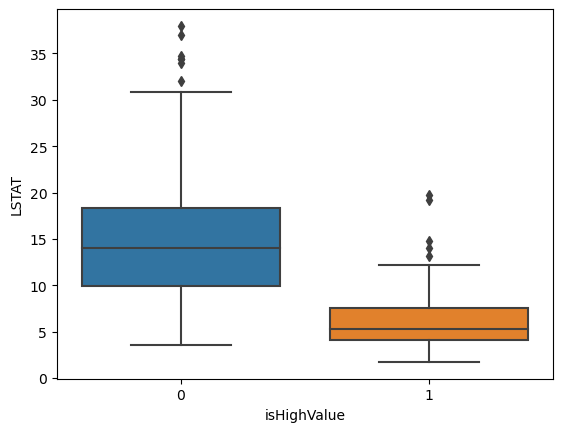

In [34]:
import seaborn as sns

sns.boxplot(x='isHighValue', y='LSTAT', data=df_c)

> `isHighValue` 값이 `0`인지 `1`인지에 따라 `LSTAT` 변수의 값 분포가 크게 차이남을 확인할 수 있다.

<Axes: xlabel='LSTAT', ylabel='Density'>

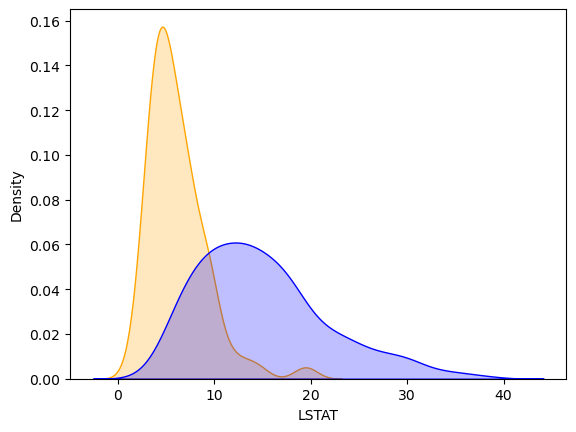

In [36]:
import seaborn as sns

sns.kdeplot(df_c.loc[df_c['isHighValue'] == 1, 'LSTAT'], color='orange', fill=True)
sns.kdeplot(df_c.loc[df_c['isHighValue'] == 0, 'LSTAT'], color='blue', fill=True)

In [65]:
import numpy as np

print(df_c.groupby('isHighValue').apply(np.mean).T)

isHighValue
0    66.891014
1    59.278099
dtype: float64


### 분석 모형 구축

- 분류 모델을 만들 때도 회귀 모델을 만들 때와 같은 방법으로 **데이터 분할** 및 **데이터 스케일링** 을 진행한다.
- 회귀 모델링 코드와 전체적인 틀은 같고, 종속 변수를 지정하는 부분만 차이가 있음을 확인한다.

#### ① 데이터 분할

In [66]:
from sklearn.model_selection import train_test_split

X_cols = ['LSTAT', 'PTRATIO', 'TAX', 'AGE', 'NOX', 'INDUS', 'CRIM']

X = data[X_cols].values
y = data['isHighValue'].values

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.3, random_state=123)

#### ② 데이터 스케일링

In [67]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

#### ③ 모델 구축

##### (a) 로지스틱 회귀(Logistic Regression)

In [68]:
from sklearn.linear_model import LogisticRegression

model_lo = LogisticRegression()
model_lo.fit(X_train_c_scaled, y_train_c)

LogisticRegression()

- 모델의 `coef_`, `intercept_` 값을 이용해 각각 선형 회귀 모델의 계수와 절편을 알 수 있다.
- 계수 값의 부호가 양(+)이면 종속 변수와 해당 변수가 **양의 관계**, 부호가 음(-)이면 **음의 관계**를 뜻한다.
- 계수 값이 클수록 그 영향도가 크다고 볼 수 있다.

In [69]:
print(model_lo.coef_)

[[-4.49810481 -2.33491876 -0.84672678  0.25118982 -0.41777635 -1.89874995
   0.70238818]]


In [70]:
print(model_lo.intercept_)

[2.17527611]


##### (b) SVM

In [71]:
from sklearn.svm import SVC

model_svc = SVC(probability=True)
model_svc.fit(X_train_c_scaled, y_train_c)

SVC(probability=True)

##### (c) 랜덤 포레스트

In [72]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=123)
model_rfc.fit(X_train_c_scaled, y_train_c)

RandomForestClassifier(random_state=123)

In [73]:
for x, val in zip(X_cols, model_rfc.feature_importances_):
    print(f'{x} : %.3f' % val)

LSTAT : 0.375
PTRATIO : 0.105
TAX : 0.099
AGE : 0.075
NOX : 0.077
INDUS : 0.166
CRIM : 0.103


### 분석 모형 평가

- 먼저 평가용 데이터로 예측값을 구한다.
- 이때, `predict` 함수를 사용하면 `threshold`가 `0.5`인 상태로 예측값을 구하게 된다.
    - 모델이 계산한 예측 확률이 0.5 이상이면 1, 아니면 0 값을 결과로 얻을 수 있다.
- `predict_proba` 함수를 사용하면 예측 확률을 구할 수 있다.

In [74]:
y_pred_lo = model_lo.predict(X_test_c_scaled)
y_pred_svc = model_svc.predict(X_test_c_scaled)
y_pred_rfc = model_rfc.predict(X_test_c_scaled)

- `sklearn` 패키지의 `accuracy_score`, `precision_score`, `recall_score` 등의 함수를 사용하면 정확도, 정밀도, 재현율 지표 값을 구할 수 있다.
- 또한 동일 패키지의 `classification_report` 함수를 사용하면 평가 지표를 한 번에 다 구할 수 있어 편리하다.

In [75]:
from sklearn.metrics import classification_report

print("-" * 60)
print("로지스틱 회귀 결과")
print(classification_report(y_test_c, y_pred_lo, labels=[0, 1]))

print("-" * 60)
print("SVM 결과")
print(classification_report(y_test_c, y_pred_svc, labels=[0, 1]))

print("-" * 60)
print("랜덤 포레스트 결과")
print(classification_report(y_test_c, y_pred_rfc, labels=[0, 1]))

print("-" * 60)

------------------------------------------------------------
로지스틱 회귀 결과
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       113
           1       0.69      0.51      0.59        39

    accuracy                           0.82       152
   macro avg       0.77      0.72      0.73       152
weighted avg       0.81      0.82      0.81       152

------------------------------------------------------------
SVM 결과
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       113
           1       0.71      0.51      0.60        39

    accuracy                           0.82       152
   macro avg       0.78      0.72      0.74       152
weighted avg       0.81      0.82      0.81       152

------------------------------------------------------------
랜덤 포레스트 결과
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       113
           1       0.79  

> 세 모델 모두 성능 지표 값이 전반적으로 좋으나, 1 클래스를 잘 맞히는지를 중점으로 보면 랜덤 포레스트 모델이 가장 우수한 것으로 보인다.

- 이번에는 AUROC 값을 구하여 전반적인 분류 모델의 성능을 비교해보자.

In [76]:
from sklearn.metrics import roc_auc_score

y_pred_lo = model_lo.predict_proba(X_test_c_scaled)[:, 1]
y_pred_svc = model_svc.predict_proba(X_test_c_scaled)[:, 1]
y_pred_rfc = model_rfc.predict_proba(X_test_c_scaled)[:, 1]

print("로지스틱 회귀 결과 : %.3f" % roc_auc_score(y_test_c, y_pred_lo))
print("SVM 결과 : %.3f" % roc_auc_score(y_test_c, y_pred_svc))
print("랜덤 포레스트 결과 : %.3f" % roc_auc_score(y_test_c, y_pred_rfc))

로지스틱 회귀 결과 : 0.872
SVM 결과 : 0.921
랜덤 포레스트 결과 : 0.919


> 랜덤 포레스트 > SVM > 로지스틱 회귀 순으로 성능이 좋게 나옴을 확인할 수 있다.